In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import trade
import random
import tester

%matplotlib inline
pd.set_option('display.notebook_repr', False)

In [2]:
# Atrificail data creation
# Sine wave

N = 2000
i = np.linspace(-np.pi, np.pi*8, N);
x = np.sin(i) + 2

df = pd.DataFrame(data=x,columns=['open'])
df['lag'] = df['open'].shift(1)
# When open increase, bar is up
df.ix[df['open'] > df['lag'], 'close'] = df['open'] + 0.1
df.ix[df['open'] > df['lag'], 'high']  = df['open'] + 0.15
df.ix[df['open'] > df['lag'], 'low']   = df['open'] - 0.05

# When open decrease, bar is down
df.ix[df['open'] < df['lag'], 'close'] = df['open'] - 0.1
df.ix[df['open'] < df['lag'], 'high']  = df['open'] + 0.05
df.ix[df['open'] < df['lag'], 'low']   = df['open'] - 0.15

# Else doji
df.ix[df['open'] == df['lag'], 'close'] = df['open']
df.ix[df['open'] == df['lag'], 'high']  = df['open'] + 0.05
df.ix[df['open'] == df['lag'], 'low']   = df['open'] - 0.05

df = df[1:]

In [3]:
data = {
    'open'  : df['open' ].values,
    'high'  : df['high' ].values,
    'low'   : df['low'  ].values,
    'close' : df['close'].values
}

In [170]:
grammar = trade.get_grammar(data)

In [177]:
rna = [random.randint(0,256) for x in range(1,10000)]
translation = grammar.translate(rna)

In [178]:
tree = grammar.build_exec_tree(translation)

In [179]:
tree.disp()

if
  not
    or
      less
        2
        ma
          80
      greater
        add
          multiple
            add
              ma
                25
              offset
                9.5
                2
            offset
              ma
                98
              6
          multiple
            offset
              ma
                31
              4
            multiple
              add
                add
                  ma
                    48
                  7.2
                sustract
                  1
                  26
              offset
                7.9
                4
        4.2
  buy
  if
    not
      less
        ma
          23
        5.7
    sell
    do_nothing


In [180]:
system = tester.System(tree, lambda x: x)

In [181]:
result = tester.test_system(system, data, 0, N)

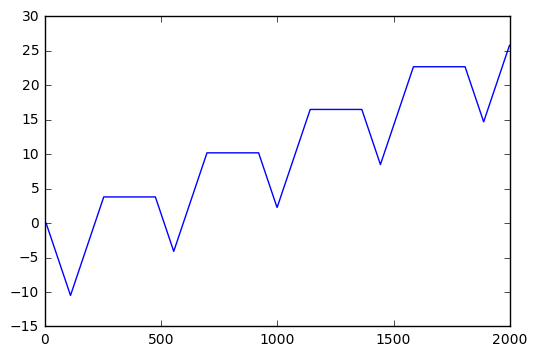

In [182]:
plt.plot(np.cumsum(result['results']))